## Data Project - Stock Market Analysis

This portfolio project will be looking at data from the stock market, particularly some technology stocks. With the help of pandas the stock information is obtained, different aspects of the stocks have been visualized, and finally based on its previous performance history,the risk of a stock is analyzed. The future stock prices have also been predicted through a Monte Carlo method!

The following questions have been answered along the way in this Project:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?


### Basic Analysis of Stock Information
How to handle requesting stock information with pandas? 

How to analyze basic attributes of a stock?

In [2]:
#Basic Import
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [3]:
#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#For reading stock data from Yahoo
from pandas.io.data import DataReader  

#For Time Stamp
from datetime import datetime

#For Division
from __future__ import division

/Applications/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
#Tech stocks used in this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
#Set up Start and End time 

end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [7]:
#Set Dataframe as Stock ticker, Read data from Yahoo
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
#Summary Stats of Apple Stock
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,119.819246,120.936667,118.538294,119.744008,5.272548e+07,118.963750
std,7.851799,7.572182,8.018452,7.770642,2.080861e+07,7.753192
min,94.870003,107.430000,92.000000,103.120003,1.447960e+07,103.120003
25%,112.567501,113.889999,111.537500,112.650002,3.841730e+07,112.262499
50%,119.169998,120.240002,118.289997,119.529999,4.834985e+07,118.991444
75%,127.142502,127.907497,125.982502,126.912502,6.076888e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.942761


In [9]:
#General Info of Apple
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-11-03 to 2015-11-02
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


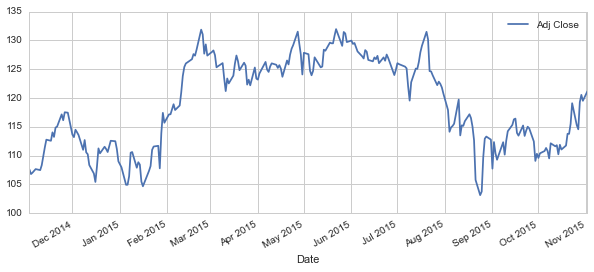

In [10]:
#Historical View of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=[10,4])

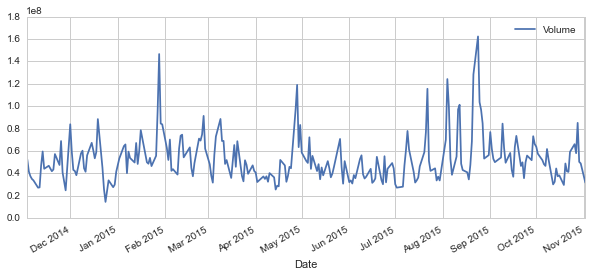

In [11]:
#Total Voulme of Stock being traded over the last year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
#Create Rolling Mean for 10,20,50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %d days" %(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']]

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2014-11-03,107.561274,NaN,NaN,NaN
2014-11-04,106.774717,NaN,NaN,NaN
2014-11-05,107.030350,NaN,NaN,NaN
2014-11-06,107.336454,NaN,NaN,NaN
2014-11-07,107.642570,NaN,NaN,NaN
2014-11-10,107.464828,NaN,NaN,NaN
2014-11-11,108.323910,NaN,NaN,NaN
2014-11-12,109.854469,NaN,NaN,NaN
2014-11-13,111.404775,NaN,NaN,NaN


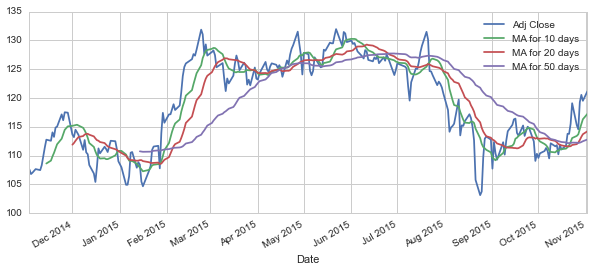

In [14]:
#plot all the Rolling Mean along with Adj Close
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend=True,subplots=False,figsize=(10,4))

### Daily return Analysis

Analyze the risk of the stock

Analyze the daily changes of the stock

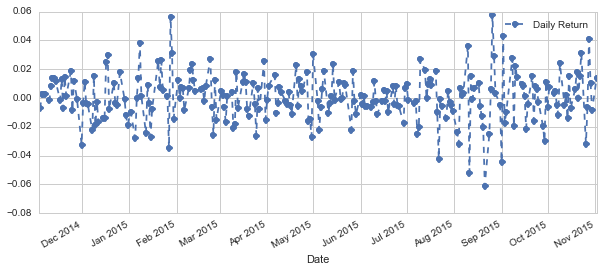

In [15]:
#Find the percent change of the day using pct_change()
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#Plot Daily Return Percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

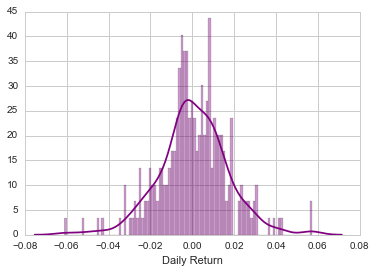

In [16]:
#Overall average daily return using seaborn to create both Histogram and KDE Plot 
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

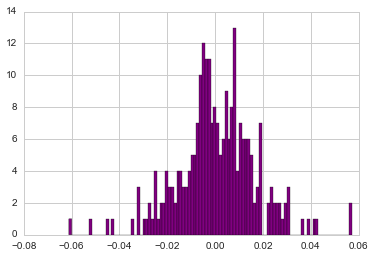

In [17]:
#Overall average daily return using Pandas to create Histogram 
AAPL['Daily Return'].hist(bins=100,color='purple')

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame through yahoo data source
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-11-03,107.561274,305.720001,555.222464,46.202610
2014-11-04,106.774717,302.809998,554.112486,46.329220
2014-11-05,107.030350,296.519989,545.922423,46.611657
2014-11-06,107.336454,296.640015,542.042458,47.429747
2014-11-07,107.642570,299.859985,541.012473,47.410269


In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-11-03,NaN,NaN,NaN,NaN
2014-11-04,-0.007313,-0.009519,-0.001999,0.002740
2014-11-05,0.002394,-0.020772,-0.014781,0.006096
2014-11-06,0.002860,0.000405,-0.007107,0.017551
2014-11-07,0.002852,0.010855,-0.001900,-0.000411


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


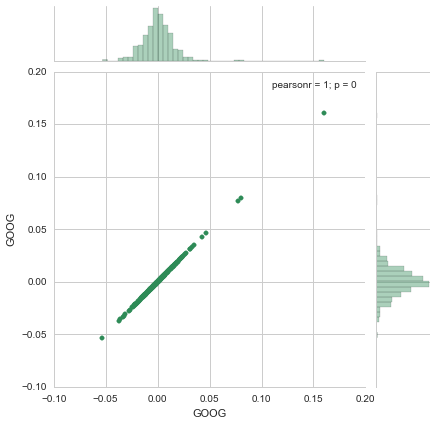

In [22]:
# Comparing two columns (Google to itself) with data source from tech_rets to show a perfectly linear relationship

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

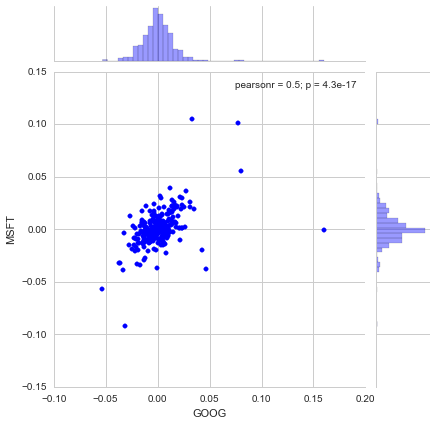

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='Blue')

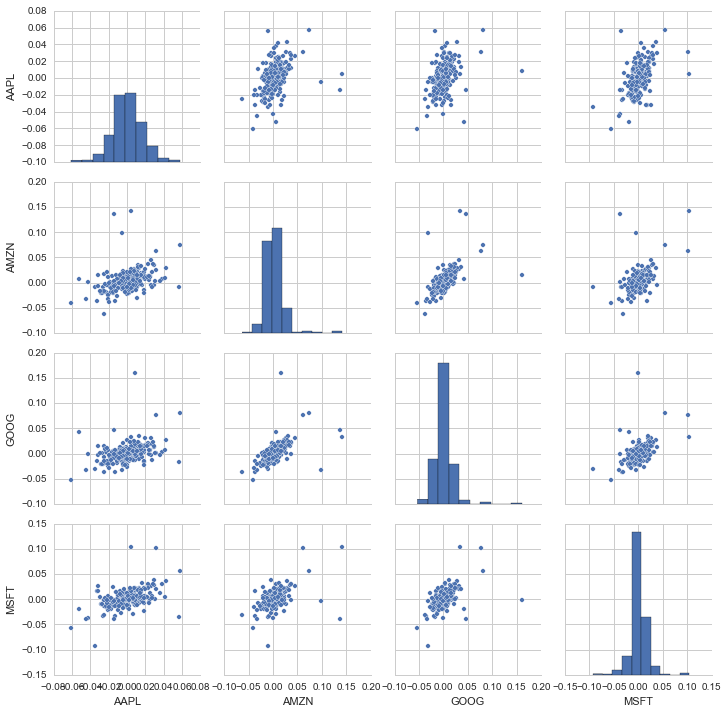

In [24]:
sns.pairplot(tech_rets.dropna())

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


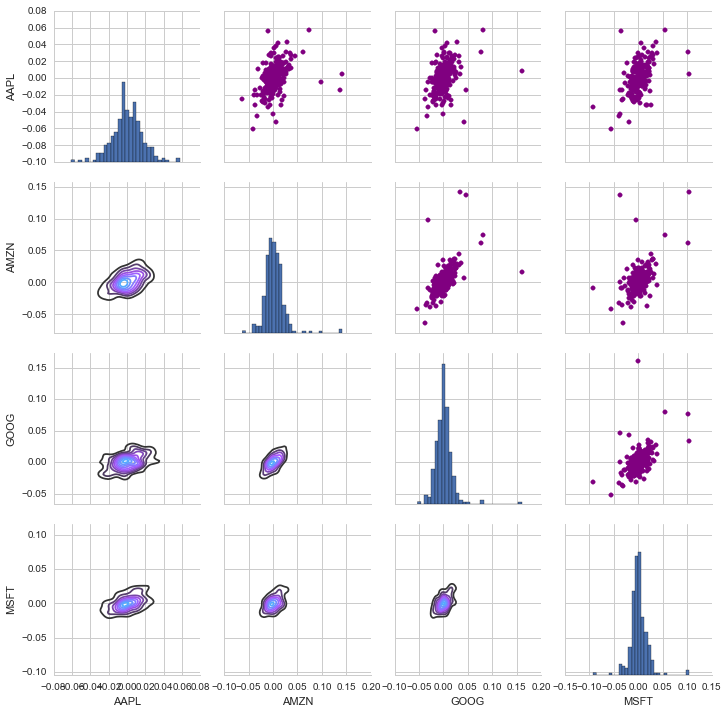

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

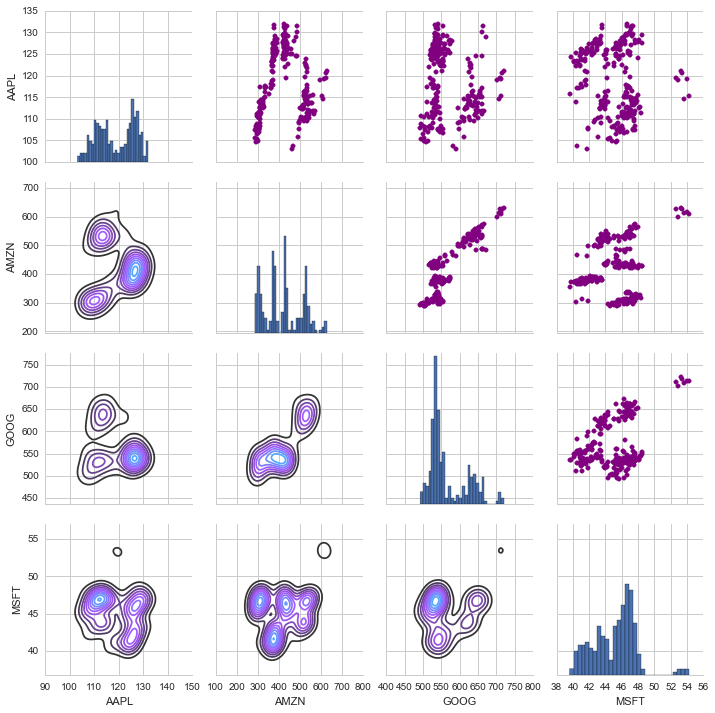

In [26]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

/Applications/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Applications/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


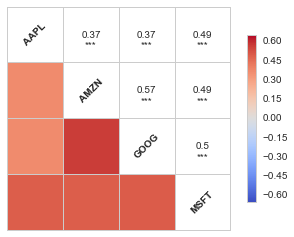

In [27]:
sns.corrplot(tech_rets.dropna(),annot=True)

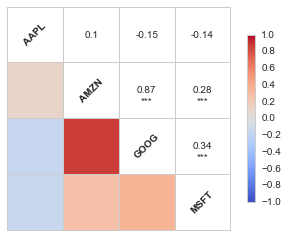

In [28]:
sns.corrplot(closing_df.dropna(),annot=True)

### Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [29]:
rets = tech_rets.dropna()

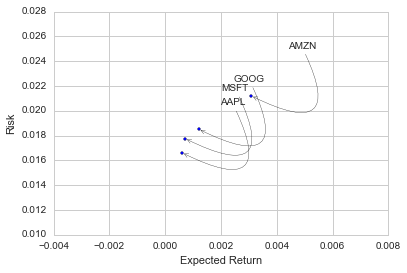

In [100]:
area = np.pi*2.5
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext =(50,50),
    textcoords = 'offset points', ha = 'center', va = 'center',
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-1.5'))


### Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile
Let's go ahead and repeat the daily returns histogram for Apple stock.

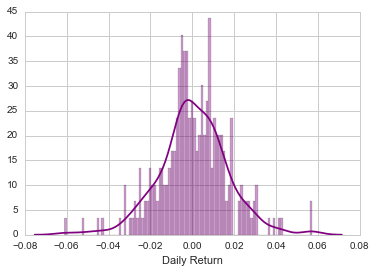

In [101]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [102]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-11-04,-0.007313,-0.009519,-0.001999,0.002740
2014-11-05,0.002394,-0.020772,-0.014781,0.006096
2014-11-06,0.002860,0.000405,-0.007107,0.017551
2014-11-07,0.002852,0.010855,-0.001900,-0.000411
2014-11-10,-0.001651,0.017508,0.011978,0.004314


In [103]:
rets['AAPL'].quantile(0.05)

-0.025849981599758598

The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.


## Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.
Let's start with a brief explanation of what we're going to do:
We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.
This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.
The equation for geometric Browninan motion is given by the following equation:
ΔSS=μΔt+σϵΔt‾‾‾√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.
We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.
ΔS=S(μΔt+σϵΔt‾‾‾√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.
For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

In [105]:
days = 365

dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


In [106]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):

        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [107]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-11-03,555.502529,557.902544,553.232510,555.222464,1382300,555.222464
2014-11-04,553.002509,555.502529,549.302481,554.112486,1244200,554.112486
2014-11-05,556.802481,556.802481,544.052426,545.922423,2032300,545.922423
2014-11-06,545.502448,546.887472,540.972385,542.042458,1333300,542.042458
2014-11-07,546.212525,546.212525,538.672437,541.012473,1633800,541.012473


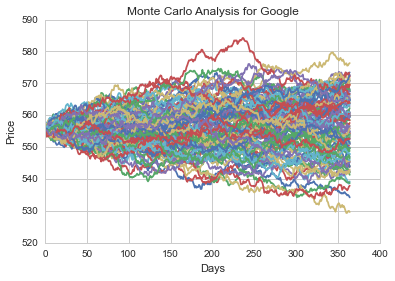

In [109]:
start_price = 555.50

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [110]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

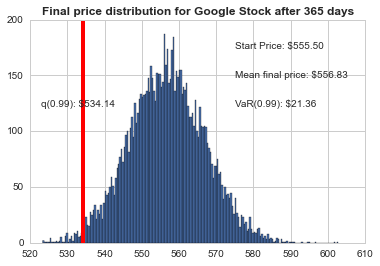

In [112]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start Price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

plt.axvline(x=q,linewidth=4,color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days,weight='bold')